In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression # model
from sklearn.model_selection import train_test_split, cross_val_score #split data, cross validation
from sklearn import metrics # evaluate model

from patsy import dmatrices

In [26]:
data = pd.read_csv("./data/train.csv")

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data = data.drop(["Ticket", "Cabin"], axis = 1)

In [29]:
data = data.dropna()     # drop rows with na

In [30]:
len(data)

712

In [31]:
type(data.Survived.value_counts())

pandas.core.series.Series

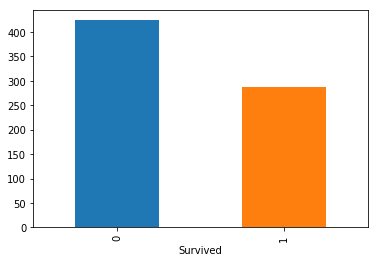

In [32]:
data.Survived.value_counts().plot(kind = "bar")
plt.xlabel("Survived")
plt.show()

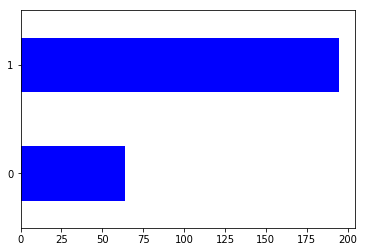

In [33]:
data.Survived[data.Sex=="female"].value_counts().sort_index().plot(kind = "barh", color = "blue", label = "Female")
# what label = "Female does here" ? why needs to sort index?

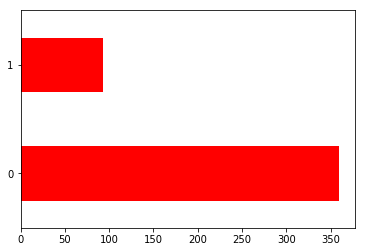

In [34]:
data.Survived[data.Sex == "male"].value_counts().sort_index().plot(kind = "barh", color = "red", label = "Male")

data.Survived[data.Pclass != 3].value_counts().plot(kind = "bar", color = "Blue", label = "High Class", alpha = 0.6 )

In [38]:
y, X = dmatrices("Survived~C(Pclass) + C(Sex) + Age + C(Embarked)", data = data, return_type = "dataframe")
y = np.ravel(y)

In [39]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
model.score(X, y)

0.7935393258426966

In [41]:
1 - y.mean()

0.5955056179775281

In [42]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.714614448906586]
1,C(Pclass)[T.2],[-0.8796488848198318]
2,C(Pclass)[T.3],[-2.0750167275172595]
3,C(Sex)[T.male],[-2.324685405580778]
4,C(Embarked)[T.Q],[-0.5866266416981758]
5,C(Embarked)[T.S],[-0.4205053600284023]
6,Age,[-0.029619705366781664]


In [44]:
test = pd.read_csv("./data/test.csv")

# handle test data to match it with model

In [45]:
yTest, Xtest = dmatrices("Survived~C(Pclass)+C(Sex)+Age+C(Embarked)", data=data, return_type="dataframe")

In [47]:
pred = model.predict(Xtest).astype(int)

In [50]:
result = pd.DataFrame(list(zip(test["PassengerId"], pred)), columns=["PassengerID", "Survived"])